# Построение доверительных интервалов

### Задача 1.

Методом перебора найдите наиболее подходящий тип распределения для выборки,содержащейся в файлеSHAD-номер группы/data_номер_посписку*.csv(воспользуйтесь соответствующими функциями для чтения файла).  Воспользуйтесьметодами описательной статистики. Сначала постройте гистограмму, чтобы получитьпредставление о форме плотности распределения. Затем изучите квантильные графикидля разных распределений. Наложите график соответствующей теоретической плотностираспределения на полученную гистограмму (параметры для теоретического графика,соответственно, должны быть подсчитаны по выборке).Примените, по возможности, критерий согласия (+доп.баллы).Выбор распределения должен быть обоснован. Без соответствующих выводов работа незасчитывается.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import numpy.random as nr
import seaborn as sns
import statsmodels.api as sm
import random

Чтение файла

In [3]:
df = pd.DataFrame()
df["x"] = pd.DataFrame.transpose(pd.read_excel("data_6.xlsx")).index
data = df["x"]

In [4]:
df

,x
0,13.196962
1,16.448855
2,12.355594
3,12.805528
4,12.256963
...,...
195,12.135954
196,12.112579
197,12.810239
198,14.187722


Визуализируем нашу выбоку, параметр bins отвечает за количество прямоугольников.Выберем 30 для простоты восприятия

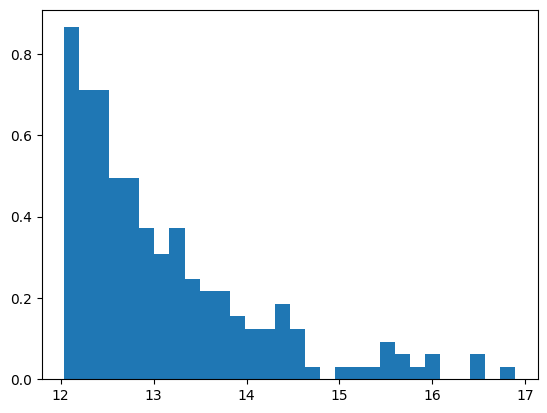

In [5]:
plt.hist(data, bins = 30, density = True)
plt.show()

Посмотрим при bins= 20

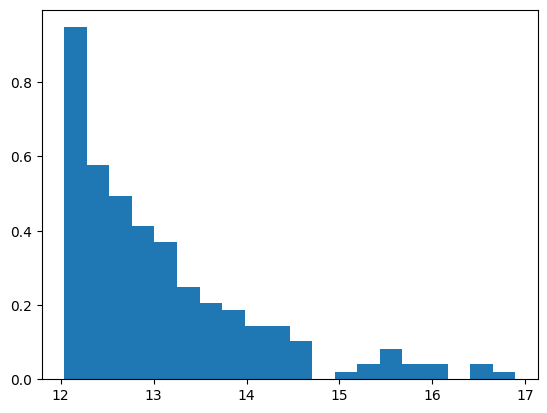

In [6]:
plt.hist(data, bins = 20, density = True)
plt.show()

Обозначим за тетту и сигму матожидание и стандартное отколонение

In [7]:
thetta,sigma = data.mean(),data.std()


Теперь будем строить квантильные графики нашей выборки с разными распределениями,чтобы понять,к какому из них принадлежит наша выборка. 

## Построим  квантильный график нормального распределения 

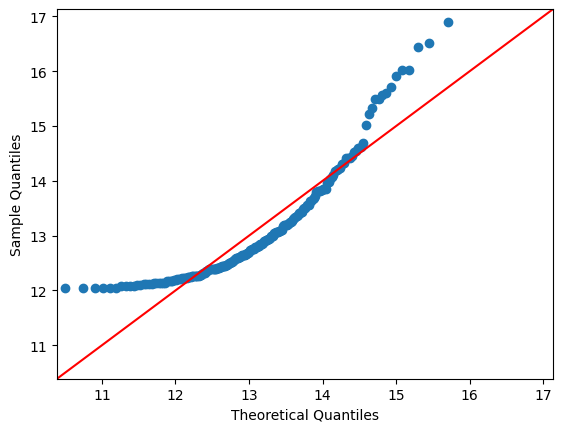

In [8]:
loc, scale = sps.norm.fit(data.to_numpy())
fig = sm.qqplot(data.to_numpy(),dist = sps.norm(loc=loc, scale=scale), line="45")
plt.show()

## Построим  квантильный график экспоненциального распределения 

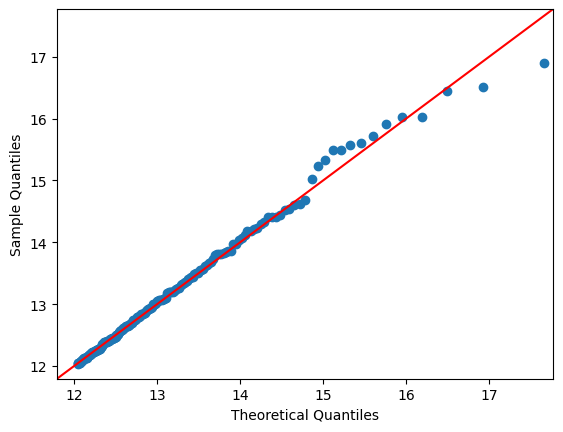

In [9]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

loc, scale = sps.expon.fit(data.to_numpy())
fig = sm.qqplot(data.to_numpy(),dist = sps.expon(loc=loc, scale=scale), line="45")
plt.show()

Мы видим,что графиком является функция прямой под углом 45 градусов. Это означает что с ростом квантилей теоертического распределения, равномерно растут и квантили нашей выборки. Из этого можно сделать вывод,что искомое распределение похоже на экспоненциальное.

## Построим  квантильный график равномерного распределения 

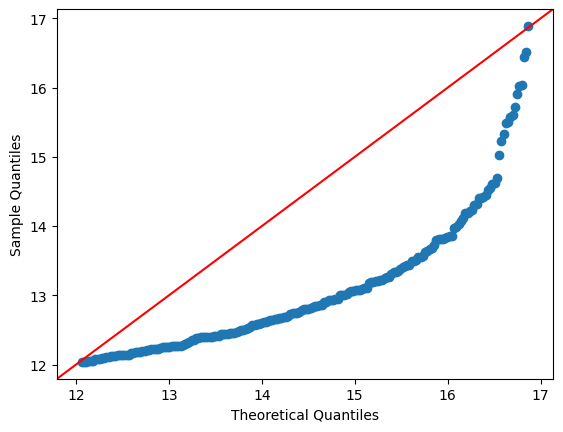

In [10]:
loc, scale = sps.uniform.fit(data.to_numpy())
fig = sm.qqplot(data.to_numpy(),dist = sps.uniform(loc=loc, scale=scale), line="45")
plt.show()

## Построим  квантильный график логнормального распределения 

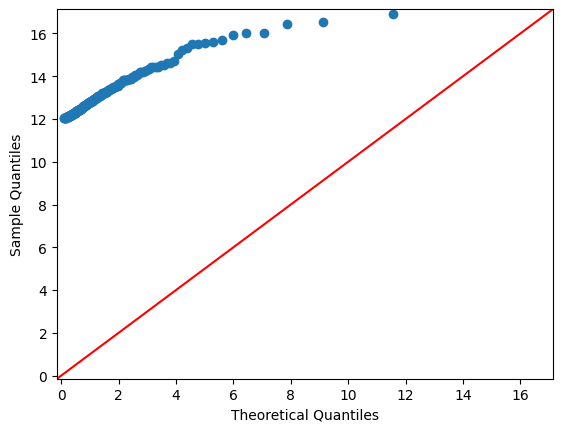

In [11]:
loc= sps.lognorm.fit(data.to_numpy())
sigma=0.95
fig = sm.qqplot(data.to_numpy(),dist = sps.lognorm(sigma), line="45")

Мы построили квантильные графики различных функций,построили график плотности нашей выборки.Однозначно можно сказать,что наша выборка распределена экспоненциально.

# Наложим график соответствующей теоретической плотности распределения на полученную гистограмму

<AxesSubplot: ylabel='Density'>

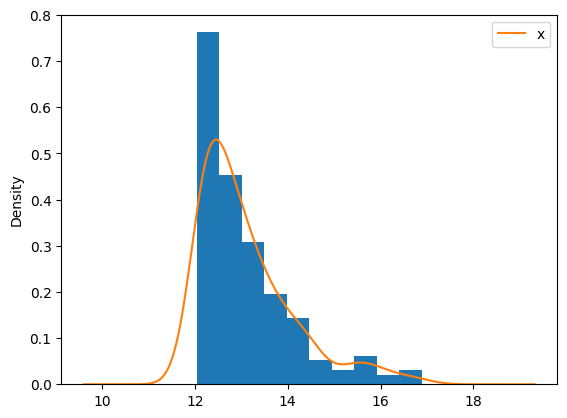

In [12]:
fig, ax = plt.subplots()
ax.hist(df, density=True)
df.plot.kde(ax=ax)

Рассмотрим различные критерии для проверки статистики нашей выборки по отношению к выборкам из раздичных распределений

## Критерий Колмогорова

Для нормального распределения с даннымипараметрами мат ожидания и ср.кв.откл.

In [13]:
thetta,sigma=df.mean(),df.std()

In [14]:
sps.kstest(df["x"],cdf = sps.norm(loc=thetta,scale=sigma).cdf)

KstestResult(statistic=0.14774617520108885, pvalue=0.00028285432499512903)

Для экспоненциального распределения.

In [15]:
sps.kstest(df["x"],cdf = sps.expon(loc=thetta,scale = sigma).cdf)

KstestResult(statistic=0.63, pvalue=2.2072145619286646e-77)

Для равномерного распределения

In [16]:
sps.kstest(df["x"],cdf = sps.uniform(df["x"].min()).cdf)

KstestResult(statistic=0.405, pvalue=3.776881955412003e-30)

Для логнормального

In [17]:
sps.kstest(df["x"],cdf = sps.lognorm(thetta).cdf)

KstestResult(statistic=0.5753299331093154, pvalue=3.0201456526316283e-63)

## Критерий Шапиро-Уилка

In [18]:
sps.shapiro(df)

ShapiroResult(statistic=0.8485705256462097, pvalue=3.6676122750801954e-13)

Ненормальное

## Критерий Смирнова

Для нормального распределения с даннымипараметрами мат ожидания и ср.кв.откл.

In [19]:
sps.ks_2samp(df["x"],sps.norm.rvs(loc=thetta,scale = sigma,size=200))

KstestResult(statistic=0.195, pvalue=0.0009668691315127085)

Для экспоненциального распределения.

In [20]:
sps.ks_2samp(df["x"], sps.expon.rvs(loc=thetta,scale = sigma,size=200))

KstestResult(statistic=0.63, pvalue=1.5506384306777397e-37)

Для равномерного распределения

In [21]:
sps.ks_2samp(df["x"], sps.uniform.rvs(df["x"].min(),size=200))

KstestResult(statistic=0.405, pvalue=4.734741877153768e-15)

Для логнормального

In [22]:
sps.ks_2samp(df["x"], sps.lognorm.rvs(thetta,size=200))

KstestResult(statistic=0.535, pvalue=1.464559370199308e-26)

## T-критерий Стьюдента

Для нормального распределения с данными параметрами мат ожидания и ср.кв.откл.

In [23]:
sps.ttest_ind(df["x"],sps.norm.rvs(loc=thetta,scale = sigma,size=200),equal_var = True)

Ttest_indResult(statistic=0.5333652586966362, pvalue=0.5940784763338103)

Для экспоненциального распределения.

In [24]:
sps.ttest_ind(df["x"],sps.expon.rvs(loc=thetta,scale = sigma,size=200),equal_var = True)

Ttest_indResult(statistic=-9.222820846403366, pvalue=1.7153923324720855e-18)

Для равномерного распределения

In [25]:
sps.ttest_ind(df["x"],sps.uniform.rvs(df["x"].min(),size=200),equal_var = True)

Ttest_indResult(statistic=7.307418929881869, pvalue=1.5024067698566837e-12)

Для логнормального

In [26]:
sps.ttest_ind(df["x"],sps.lognorm.rvs(thetta,size=200),equal_var = True)

Ttest_indResult(statistic=-1.324691902169285, pvalue=0.1860334565349528)

# Задание 2

## Здесь мы будем оценивать параметр $\lambda$ экспоненциального распределения

$$
x=(x_{1},x_{2}, ... x_{n})\sim Exp(\theta)\\
\textbf{F}_{\theta}(x) = 1-e^{-x\theta},x>0\\
\textbf{P}_{\theta}(x) = \theta e^{-\theta x}\\
М.О:\int_{0}^{\infty}x \textbf{P}_{\theta}(x)dx =\frac{1}{\overline\theta}\\
E\xi = \frac{1}{\overline{\theta}}=\overline{x}\Rightarrow \overline\theta = \frac{1}{\overline x }\\
\Delta\xi = \frac{1}{\theta^{2}}
$$

Теоретический доверительный интервал: 

$$
\mathbb{P}\left( \bar{X} - \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} < \mu < \bar{X} + \frac{c_{1-\alpha/2}\sigma}{\sqrt{n}} \right) = 1-\alpha,
$$
где $c_{\alpha}$ — квантиль распределения $\mathcal{N}(0,1)$ уровня $\alpha$.

In [27]:
thetta,sigma = data.mean(),data.std()
n=200
thetta,sigma


(13.097960233382636, 1.0129039513238804)

Зная доверительный интервал для мат.ожидания,мы можем найти итоговый интервал,края которого будут обратны. Зная Теоретический доверительный инетрвал для выборочного среднего,и тот факт,что в нашем распределении выборочная $\lambda$ обратна выборочному мат. ожиданию,получаем искомую формулу.Она обратная тому что выше.

Оцениваемое значение:  0.07634776577281935
Доверительный интервал для уровня доверия = 0.99:  [0.07605531250174516, 0.07664247684980614]
Доверительный интервал для уровня доверия = 0.95:  [0.07603822948250191, 0.07665983248353586]
Доверительный интервал для уровня доверия = 0.9:  [0.07601584621690921, 0.07668259666265353]


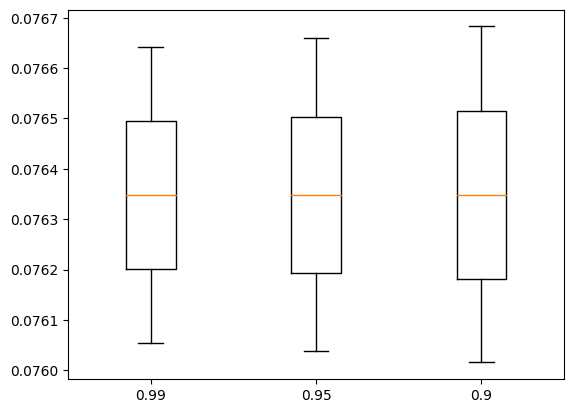

In [32]:
lamb = n/sum(df["x"])
print("Оцениваемое значение: ",lamb)
fragn = {}
for alpha in [0.99,0.95,0.9]:
    CI_Theoretical = [ 1/(thetta + sps.expon.ppf(1-alpha/2)*sigma/np.sqrt(n)),1/(thetta - sps.expon.ppf(1-alpha/2)*sigma/np.sqrt(n))]
    print(f"Доверительный интервал для уровня доверия = {alpha}: ",CI_Theoretical)
    fragn[f"{alpha}"] =[CI_Theoretical[0],CI_Theoretical[1],lamb]
fig, ax = plt.subplots()
ax.boxplot(fragn.values())
ax.set_xticklabels(fragn.keys())
plt.show()

$$
x=(x_{1},x_{2}, ... x_{n})\sim Exp(\theta)\\
\textbf{F}_{\theta}(x) = 1-e^{-x\theta},x>0\\
\textbf{P}_{\theta}(x) = \theta e^{-\theta x}\\
f(x_{1},x_{2},x_{3}...x_{n}) = f(x_{1})f(x_{2})...f(x_{n}) = \prod_{i=1}^{n}\theta e^{-\theta x_{i}}\\
l(\lambda) = \sum_{i=1}^{n} \ln \theta(-\lambda x_{i}) = n \ln \theta - \theta \sum_{i=1}^{n}x_{i}
$$

$$
x=(x_{1},x_{2}...x_{n})\sim Exp(\lambda)\\
\text{Построим доверительный интервал для параметра }\lambda\\
\text{По методу моментов мы определили выборочный параметр }\widehat{\lambda} = \frac{1}{\overline{x}}\\
l(\lambda) = n\ln{\lambda}-\lambda\sum_{i=1}^{n}x_{i}\\
\acute{l}= \frac{n}{\lambda}-\sum_{i=1}^{n}x_{i}\\
\acute{\acute{l}} = n\frac{-1}{\lambda^{2}}\\
\overline{\textbf{I}} = -\acute{\acute{l}}(\overline{\lambda}) =\frac{n}{\overline{\lambda}^{2}}\\
\widehat{var} = \overline{\textbf{I}}^{-1}\\
se(\widehat\lambda) = \sqrt{\widehat{var}}\\
\text{Итоговый интервал: }\\
[\widehat{\lambda} - z_{cr}se(\widehat\lambda);\widehat{\lambda} + z_{cr}se(\widehat\lambda)]
$$

Искомая лямбда

In [28]:
lamb = n/sum(df["x"])
lamb

0.07634776577281935

In [29]:
I = n/((lamb)**2)#информация Фишера
I

34311.3124550546

In [30]:
var=1/I# оценка дисперсии лямбды с крышкой
var

2.9144906692506432e-05

In [31]:
se = var**0.5#стандартная ошибка лямбды с крышкой
se

0.0053986022906402755

In [32]:
# для 95% zкритическое =0.07/z ищем по z-таблице,где искомое значение это бета/2,тоесть для 95 это (1-0.05)/2
Interval_95 = [lamb-1.96*se,lamb+1.96*se]
Interval_95

[0.06576650528316441, 0.08692902626247428]

[0.07629377974991294, 0.07640175179572575]
[0.07596986361247453, 0.07672566793316417]
[0.07569993349794252, 0.07699559804769618]


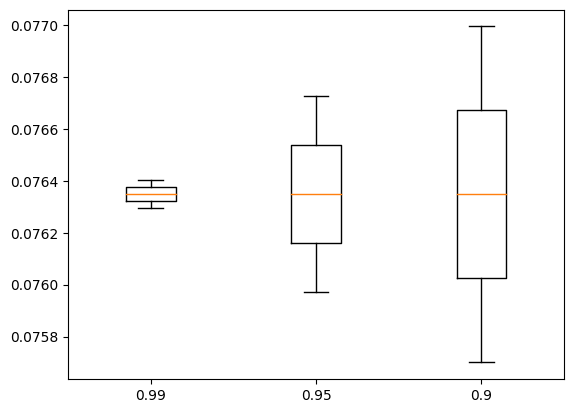

In [33]:
#99%-2.57
Interval_99 = [lamb-0.01*se,lamb+0.01*se]
Interval_95 = [lamb-0.07*se,lamb+0.07*se]
Interval_90 = [lamb-0.12*se,lamb+0.12*se]
print(Interval_99)
print(Interval_95)
print(Interval_90)
fragn = {}
fragn[0.99] =[Interval_99[0],Interval_99[1],lamb]
fragn[0.95] =[Interval_95[0],Interval_95[1],lamb]
fragn[0.9] =[Interval_90[0],Interval_90[1],lamb]
fig, ax = plt.subplots()
ax.boxplot(fragn.values())
ax.set_xticklabels(fragn.keys())
plt.show()

Реализуем с помощью python

Оцениваемое значение:  0.07634776577281935
Доверительный интервал для alpha = 0.01:  0.07627383733948455 , 0.07642183765549247
Доверительный интервал для alpha = 0.05:  0.07597931923341324 , 0.07671980314109873
Доверительный интервал для alpha = 0.1:  0.07561297677654397 , 0.07709697592123675


/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_12757/927649276.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  CI_Theoretical = sps.norm.interval(alpha=alpha, loc=thetta, scale=sigma)


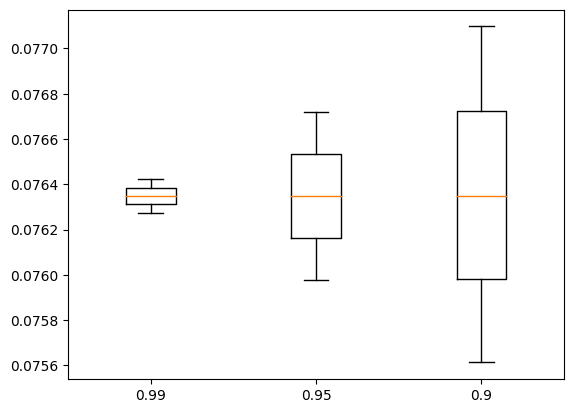

In [34]:
print("Оцениваемое значение: ",lamb)
fragn = {}
for alpha in [0.01,0.05,0.1]:
    CI_Theoretical = sps.norm.interval(alpha=alpha, loc=thetta, scale=sigma)
    print(f"Доверительный интервал для alpha = {alpha}: ",1/CI_Theoretical[1],"," ,1/CI_Theoretical[0])
    fragn[f"{1-alpha}"] =[1/CI_Theoretical[0],1/CI_Theoretical[1],lamb]
fig, ax = plt.subplots()
ax.boxplot(fragn.values())
ax.set_xticklabels(fragn.keys())
plt.show()

# Bootstrapping на основе параметрического бустинга

In [35]:

print(np.mean(data))
number_of_bootstrap_samples = 10 # количество бутстрэп-выборок
size_of_bootstrap_samples = 20 # размер бутстрэп-выборок
bootstrap_samples = []
#bootstrap_samples = np.random.exponential(scale=thetta,size=[number_of_bootstrap_samples,size_of_bootstrap_samples]) 
for i in range(number_of_bootstrap_samples):
    bootstrap_samples.append(sps.expon(loc=thetta).rvs(size=size_of_bootstrap_samples))
bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)
CI_Bootstrap_Parametric = [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]
print("Доверительный интервал на основе парметрического бустрэпа равен", CI_Bootstrap_Parametric)

13.097960233382636
Доверительный интервал на основе парметрического бустрэпа равен [13.774660974374655, 14.151312525276172]


# Bootstrapping на основе непараметрического бустинга

In [36]:
print(np.mean(data))
number_of_bootstrap_samples = 10 # количество бутстрэп-выборок
size_of_bootstrap_samples = 20 # размер бутстрэп-выборок
bootstrap_samples = []
for i in range(number_of_bootstrap_samples):
    bootstrap_samples.append(random.sample(data.tolist(),size_of_bootstrap_samples ))

bootstrap_estimates = np.apply_along_axis(np.mean, 1, bootstrap_samples)

CI_Bootstrap_Nonparametric = [np.quantile(bootstrap_estimates,alpha/2), np.quantile(bootstrap_estimates,1-alpha/2)]
print("Доверительный интервал на основе парметрического бустрэпа равен", CI_Bootstrap_Nonparametric )

13.097960233382636
Доверительный интервал на основе парметрического бустрэпа равен [12.896563157477457, 13.490021879751835]


Вывод: мы нашли доверительные интервалы для параметра $\lambda$ разными способами и наглядно увидели их точность. Всё-таки лучшим способом является теоеретический подход и подход,встроенный в scipy.